In [1]:
import pandas as pd
df=pd.read_csv('c:/data/school/data.csv')
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols=df.columns[0:8]
print(train_cols)
X=df[train_cols]
y=df["Label"]
print(df[train_cols].head())
print(y.head())

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')
   teaching  international  research  citations  income  num_students  \
0      12.4           95.6      10.6       13.3    33.3          5226   
1      29.9           90.1      20.1       65.3    33.9          2473   
2      24.7           82.6      18.9       43.5    28.4          2473   
3      61.3           98.6      67.5       94.6    65.4          9666   
4      62.4           98.8      57.0       95.0    49.8          9666   

   student_staff_ratio  international_students  
0                 14.1                    0.82  
1                 15.6                    0.63  
2                 15.6                    0.63  
3                 10.5                    0.54  
4                 10.5                    0.54  
0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64


In [3]:
df.columns

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students',
       'total_score', 'Label'],
      dtype='object')

In [4]:
df.shape

(2603, 10)

In [5]:
df.describe()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,37.801498,52.007415,35.910257,60.921629,48.897810,23332.632347,18.027199,0.150465,59.821283,0.170957
std,17.604218,22.065565,21.254805,23.073219,20.275104,17832.143362,11.656084,0.107366,8.694916,0.376543
min,9.900000,7.100000,2.900000,1.200000,24.200000,0.000000,0.000000,0.000000,41.400000,0.000000
25%,24.700000,33.500000,19.600000,45.500000,33.600000,12199.500000,11.650000,0.070000,57.100000,0.000000
50%,33.900000,50.400000,30.500000,62.500000,42.600000,20584.000000,15.900000,0.130000,59.800000,0.000000
75%,46.400000,69.000000,47.250000,79.050000,56.000000,29787.000000,21.200000,0.210000,59.800000,0.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,0.820000,96.100000,1.000000


In [6]:
df.groupby("Label").mean()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score
Label,,,,,,,,,
0,31.706997,50.156487,28.500232,55.836932,46.934847,22949.920760,19.033086,0.137312,56.969555
1,67.356404,60.983371,71.844719,85.579551,58.417079,25188.568539,13.149213,0.214247,73.650562


In [7]:
df["Label"].value_counts()

0    2158
1     445
Name: Label, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:bad, 1: good)')

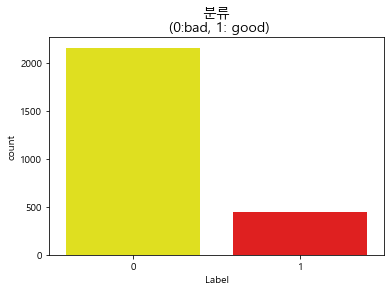

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
colors=["yellow","red"]
sns.countplot('Label', data=df, palette=colors)
plt.title('분류\n (0:bad, 1: good)',fontsize=14)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [10]:
df_samp["Label"].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [11]:
X=df_samp[train_cols]
y=df_samp['Label']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y,random_state=10)

In [13]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state=10)
logit.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [14]:
print("학습용:",logit.score(X_train, y_train)) 
print("검증용:",logit.score(X_test, y_test)) 

학습용: 0.8890449438202247
검증용: 0.8539325842696629


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train))
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

In [16]:
result_tr=[]
result_te=[]

In [17]:
logit = LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10)

In [18]:
score_tr=logit.score(X_train_scaled, y_train)
score_te=logit.score(X_test_scaled, y_test)
print("학습용:",score_tr) 
print("검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9887640449438202
검증용: 0.9943820224719101


In [19]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=10)

In [20]:
print("학습용:",tree.score(X_train_scaled, y_train)) 
print("검증용:",tree.score(X_test_scaled,y_test)) 

학습용: 1.0
검증용: 0.9719101123595506


In [21]:
tree=DecisionTreeClassifier(max_depth=4,random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [22]:
score_tr=tree.score(X_train_scaled,y_train)
score_te=tree.score(X_test_scaled,y_test)
print("학습용:",score_tr) 
print("검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9789325842696629
검증용: 0.9775280898876404


In [23]:
print(score_tr)
print(score_te)

0.9789325842696629
0.9775280898876404


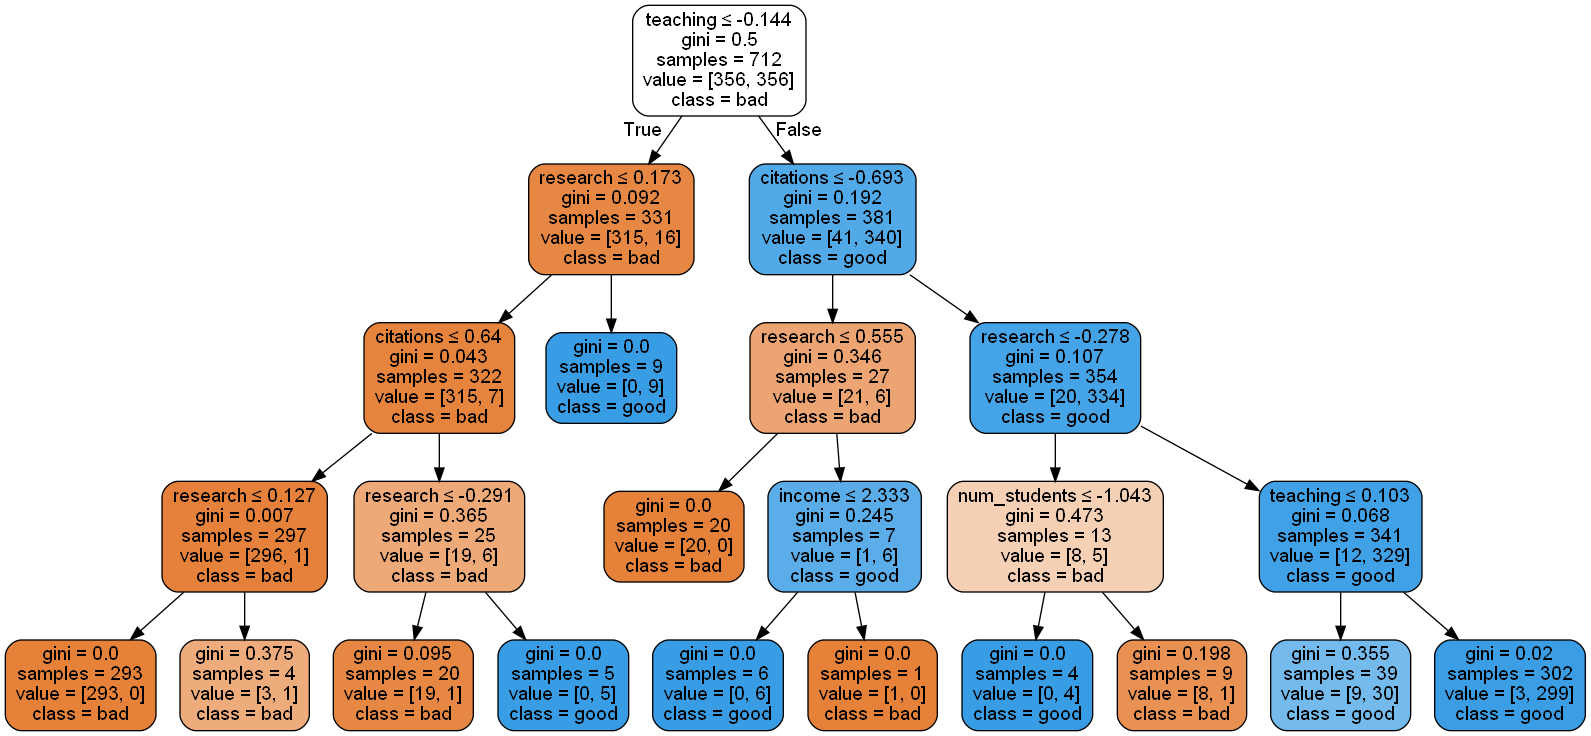

In [24]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data=export_graphviz(tree, out_file=None, feature_names=train_cols,
class_names=["bad","good"],filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

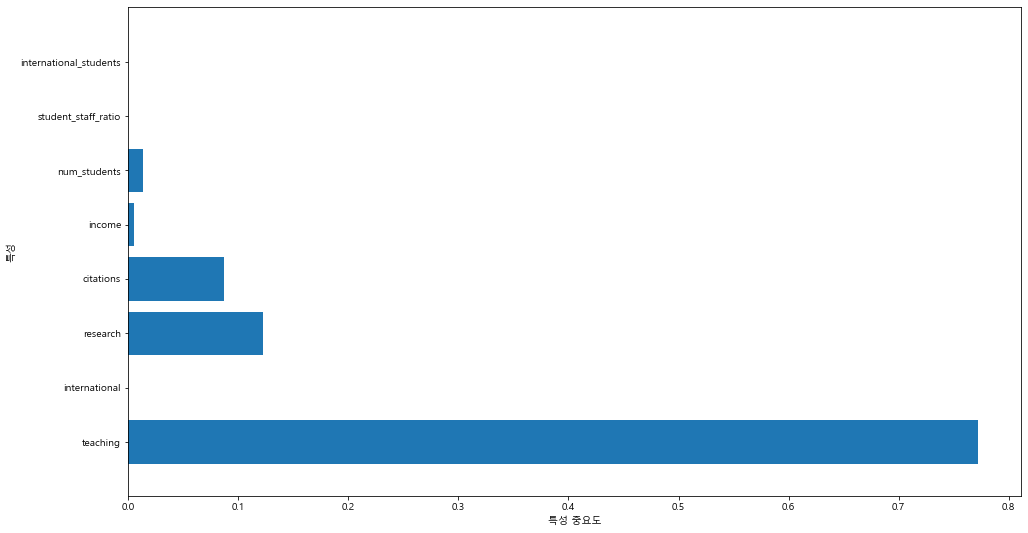

In [25]:
import numpy as np
def plot_tree(model):
    n_features=X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_tree(tree)

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,random_state=10)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [27]:
score_tr=forest.score(X_train_scaled,y_train)
score_te=forest.score(X_test_scaled,y_test)
print("학습용:",score_tr) 
print("검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 1.0
검증용: 0.9943820224719101


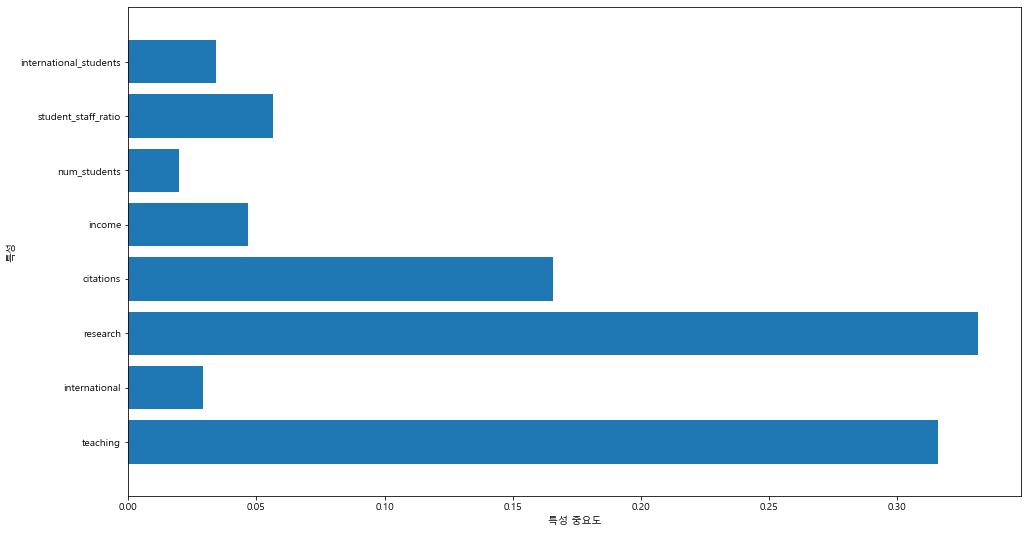

In [28]:
plot_tree(forest)

최적의 k 5
최적의 정확도: 0.9887640449438202


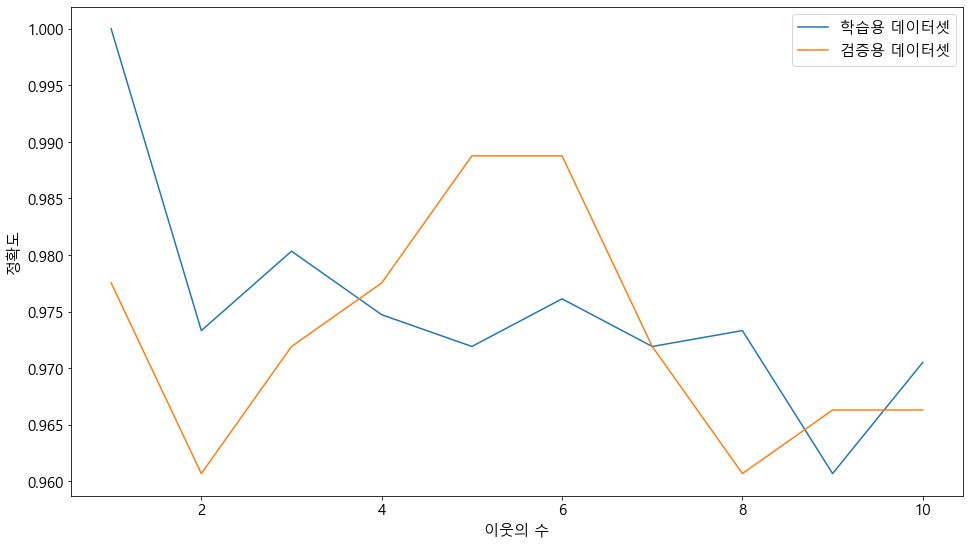

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate = []
test_rate = []

neighbors=range(1,11)
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled,y_train)
    train_rate.append(knn.score(X_train_scaled,y_train))
    test_rate.append(knn.score(X_test_scaled,y_test))

test_arr=np.array(test_rate)
max_rate=np.max(test_arr)
idx=np.where(test_arr == max_rate)[0][0]
print("최적의 k",neighbors[idx])
print("최적의 정확도:",test_rate[idx])

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label='학습용 데이터셋')
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()


In [30]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
score_tr=knn.score(X_train_scaled,y_train)
score_te=knn.score(X_test_scaled,y_test)
print("학습용:",score_tr) 
print("검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9803370786516854
검증용: 0.9719101123595506


In [32]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=10)
mlp.fit(X_train_scaled,y_train)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=10)

In [33]:
print("학습용:",mlp.score(X_train_scaled, y_train)) 
print("검증용:",mlp.score(X_test_scaled,y_test)) 

학습용: 0.9943820224719101
검증용: 0.9943820224719101


In [34]:
mlp=MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100],random_state=10)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=1000, random_state=10)

In [35]:
score_tr=mlp.score(X_train_scaled,y_train)
score_te=mlp.score(X_test_scaled,y_test)
print("학습용:",score_tr) 
print("검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 1.0
검증용: 1.0


In [36]:
print(result_tr)
print(result_te)

[0.9887640449438202, 0.9789325842696629, 1.0, 0.9803370786516854, 1.0]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9719101123595506, 1.0]


In [37]:
from sklearn.svm import SVC
svm=SVC(random_state=10)
svm.fit(X_train_scaled,y_train)

SVC(random_state=10)

In [38]:
print("학습용:",svm.score(X_train_scaled, y_train)) 
print("검증용:",svm.score(X_test_scaled,y_test)) 

학습용: 0.9873595505617978
검증용: 0.9887640449438202


In [39]:
import numpy as np
train_rate=[]
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000]
g_values=[0.0001,0.001,0.01,0.1]

for n in c_values:
    for g in g_values:
        svm=SVC(C=n,gamma=g,random_state=10)
        svm.fit(X_train_scaled,y_train)
        train_rate.append([n,g,svm.score(X_train_scaled,y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled,y_test)])

최적의 c: 100
최적의 gamma: 0.01
최적의 정확도: 1.0


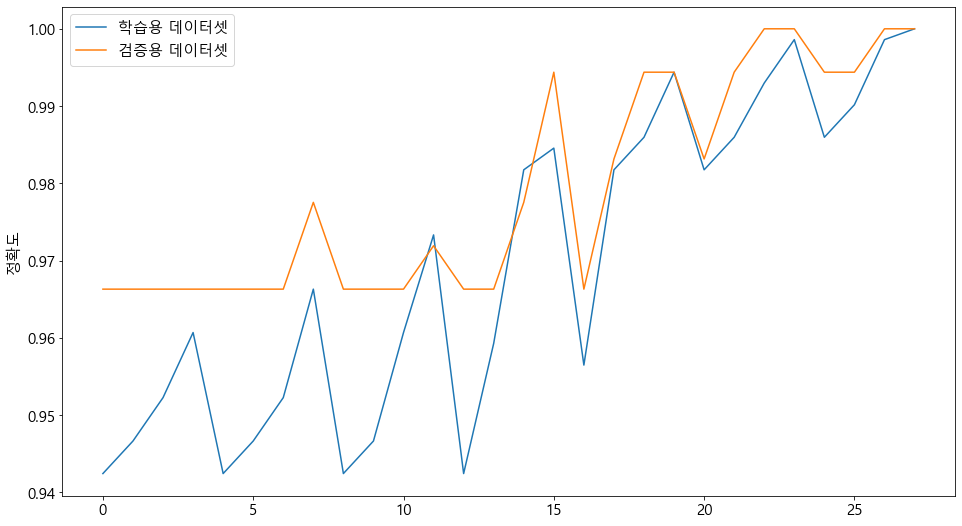

In [40]:
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
idx=np.argmax(test_arr[:,2])
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:,2], label="검증용 데이터셋")
plt.ylabel("정확도")
plt.legend()

In [41]:
from sklearn.svm import SVC
svm = SVC(C=1,gamma=0.0001,random_state=10)
svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.0001, random_state=10)

In [42]:
score_tr=svm.score(X_train_scaled,y_train)
score_te=svm.score(X_test_scaled,y_test)
print("학습용:",score_tr) 
print("검증용:",score_te) 
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9424157303370787
검증용: 0.9662921348314607


Text(0.5, 0, 'number of clusters')

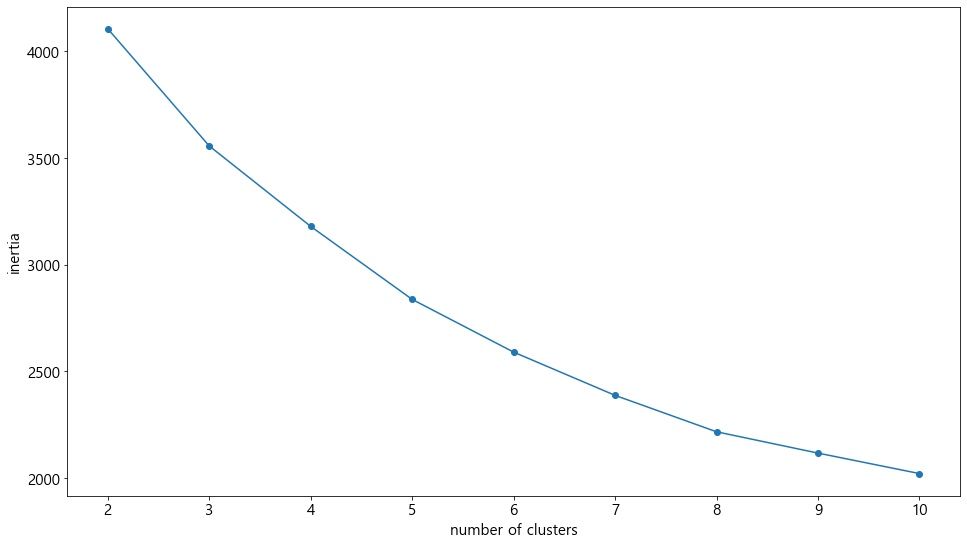

In [43]:
from sklearn.cluster import KMeans
clusters=range(2,11)
inertias=[]

for n in clusters:
    km=KMeans(n_clusters=n,random_state=10)
    km.fit(X_train_scaled)
    inertias.append(km.inertia_)
plt.rcParams["font.size"]=15
plt.plot(clusters,inertias,'-o')
plt.ylabel("inertia")
plt.xlabel("number of clusters")

In [44]:
km=KMeans(n_clusters=5,random_state=10)
km.fit(X_train_scaled)
pred_tr=km.predict(X_train_scaled)
pred_te=km.predict(X_test_scaled)

In [45]:
from sklearn.metrics import silhouette_score
score_tr=silhouette_score(X_train_scaled,pred_tr)
score_te=silhouette_score(X_test_scaled,pred_te)
print(score_tr)
print(score_te)


0.20410528831789523
0.20148731094280548


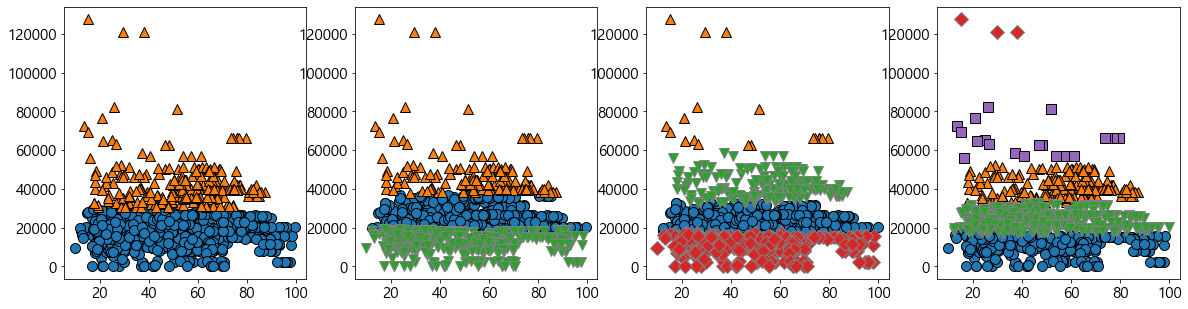

In [46]:
import mglearn
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
idx=0
for k in [2,3,4,5]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    lbls = km.labels_
    mglearn.discrete_scatter(X["teaching"], X["num_students"], lbls, ax=axes[idx])
    idx+=1


['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.9887640449438202, 0.9789325842696629, 1.0, 0.9803370786516854, 1.0, 0.9424157303370787]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9719101123595506, 1.0, 0.9662921348314607]
최적의 알고리즘(학습용): RF
최적의 정확도(학습용): 1.0
최적의 알고리즘(검증용): ANN
최적의 정확도(검증용): 1.0


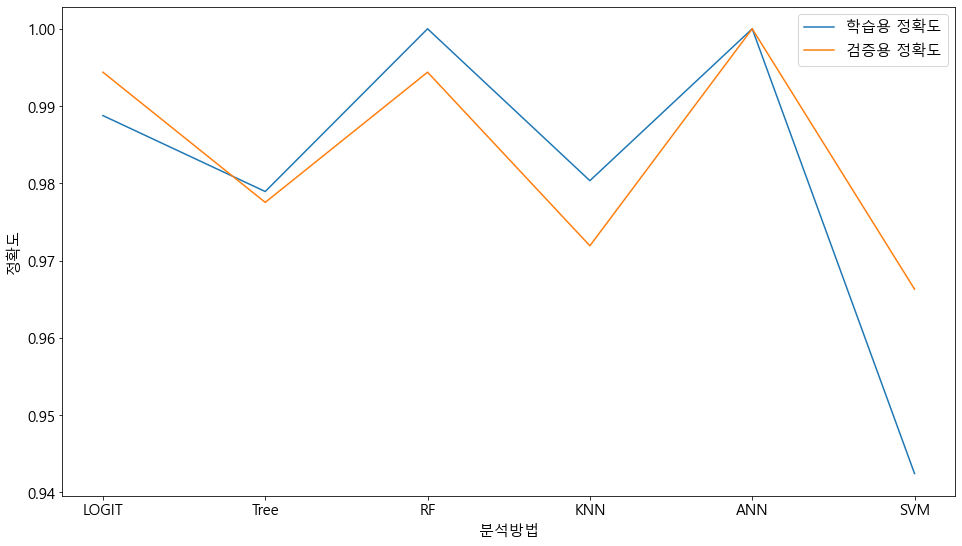

In [47]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM"]

result_tr_arr=np.array(result_tr) #검증용 데이터셋의 정확도
max_rate_tr=np.max(result_tr_arr) #가장 좋은 정확도
idx_tr=np.argmax(result_tr_arr) #가장 성능이 좋은 인덱스
result_te_arr=np.array(result_te) #검증용 데이터셋의 정확도
max_rate_te=np.max(result_te_arr) #가장 좋은 정확도
idx_te=np.argmax(result_te_arr) #가장 성능이 좋은 인덱스

print(methods)
print(result_tr)
print(result_te)
print("최적의 알고리즘(학습용):",methods[idx_tr]) 
print("최적의 정확도(학습용):",max_rate_tr)
print("최적의 알고리즘(검증용):",methods[idx_te]) 
print("최적의 정확도(검증용):",max_rate_te) 

plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도") 
plt.xlabel("분석방법") 
plt.ylabel("정확도") 
plt.legend()